# Einleitung

In diesem Jupyter-Notebook durchlaufen wir alle relevanten Schritte des Machine-Learnings.

# Verwendeter Datensatz

Wir wollen mit realen Daten arbeiten. Bei [Kaggle](https://www.kaggle.com/) können wir viele Datensätze finden. Diesen hier verwenden wir im Folgenden:

https://www.kaggle.com/c/house-prices-advanced-regression-techniques

Der Datensatz enthält in den Trainingsdaten 1460 Beispiele von Häusern, wobei deren Eigenschaften und deren jeweiliger tatsächlicher Verkaufspreis aufgeführt ist.

# Daten einlesen

In [1]:
import pandas as pd

In [2]:
t = pd.read_csv("hausbeispiele.csv")

In [3]:
t

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [4]:
t["YearBuilt"]

0       2003
1       1976
2       2001
3       1915
4       2000
        ... 
1455    1999
1456    1978
1457    1941
1458    1950
1459    1965
Name: YearBuilt, Length: 1460, dtype: int64

In [5]:
t.shape

(1460, 81)

In [6]:
t.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


# Beispielplot erzeugen

In [7]:
t["YearBuilt"]

0       2003
1       1976
2       2001
3       1915
4       2000
        ... 
1455    1999
1456    1978
1457    1941
1458    1950
1459    1965
Name: YearBuilt, Length: 1460, dtype: int64

In [8]:
t["SalePrice"]

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

In [9]:
x = t["YearBuilt"]
y = t["SalePrice"]

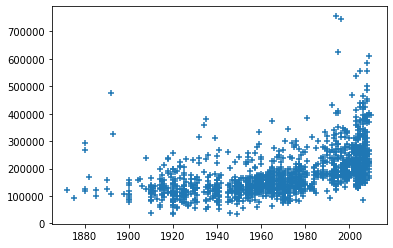

In [10]:
import matplotlib.pyplot as plt
plt.scatter(x,y, marker="+")
plt.show()

# Input- und Outputdaten definieren

In [11]:
data_input = t[["YearBuilt", "LotArea", "OverallQual"]].values

In [12]:
data_input.shape

(1460, 3)

In [13]:
nr_inputs = data_input.shape[1]
nr_inputs

3

In [14]:
data_input

array([[ 2003,  8450,     7],
       [ 1976,  9600,     6],
       [ 2001, 11250,     7],
       ...,
       [ 1941,  9042,     7],
       [ 1950,  9717,     5],
       [ 1965,  9937,     5]])

In [15]:
data_output = t["SalePrice"].values

In [16]:
data_output

array([208500, 181500, 223500, ..., 266500, 142125, 147500])

# Daten normalisieren

In [17]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

scaler_input = MinMaxScaler(feature_range=(0, 1))
scaled_input_data = scaler_input.fit_transform(data_input)

scaler_output = MinMaxScaler(feature_range=(0, 1))
scaled_output_data = scaler_output.fit_transform(data_output.reshape(-1,1))

In [18]:
scaled_input_data

array([[0.94927536, 0.0334198 , 0.66666667],
       [0.75362319, 0.03879502, 0.55555556],
       [0.93478261, 0.04650728, 0.66666667],
       ...,
       [0.5       , 0.03618687, 0.66666667],
       [0.56521739, 0.03934189, 0.44444444],
       [0.67391304, 0.04037019, 0.44444444]])

In [19]:
scaled_output_data

array([[0.24107763],
       [0.20358284],
       [0.26190807],
       ...,
       [0.321622  ],
       [0.14890293],
       [0.15636717]])

# Trainings- und Testdaten definieren

In [20]:
x_train = scaled_input_data[0:1000]
y_train = scaled_output_data[0:1000]

x_test  = scaled_input_data[1000:]
y_test  = scaled_output_data[1000:]

In [21]:
x_train.shape

(1000, 3)

In [22]:
y_train.shape

(1000, 1)

In [23]:
x_test.shape

(460, 3)

In [24]:
y_test.shape

(460, 1)

In [25]:
print(x_train[10], "-->", y_train[10])

[0.67391304 0.04627357 0.44444444] --> [0.13137064]


# MLP vorbereiten

In [27]:
import tensorflow as tf
from tensorflow import keras

tf.keras.backend.clear_session()

model = keras.Sequential()
model.add(keras.layers.Dense(80,
                             activation="relu",
                             input_shape=(nr_inputs,),
                             name="Schicht1"))
                             
model.add(keras.layers.Dense(1,
                             activation="linear",
                             name="Outputschicht"))

model.compile(optimizer='sgd',           
              loss=tf.keras.losses.MeanSquaredError(),
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Schicht1 (Dense)            (None, 80)                320       
                                                                 
 Outputschicht (Dense)       (None, 1)                 81        
                                                                 
Total params: 401
Trainable params: 401
Non-trainable params: 0
_________________________________________________________________


# MLP trainieren

In [28]:
history = model.fit(x_train,
                    y_train,
                    epochs=200)

Epoch 1/200
32/32 [==============================] - 0s 915us/step - loss: 0.0093 - accuracy: 0.0010
Epoch 2/200
32/32 [==============================] - 0s 806us/step - loss: 0.0076 - accuracy: 0.0010
Epoch 3/200
32/32 [==============================] - 0s 772us/step - loss: 0.0074 - accuracy: 0.0010
Epoch 4/200
32/32 [==============================] - 0s 873us/step - loss: 0.0073 - accuracy: 0.0010
Epoch 5/200
32/32 [==============================] - 0s 863us/step - loss: 0.0072 - accuracy: 0.0010
Epoch 6/200
32/32 [==============================] - 0s 741us/step - loss: 0.0071 - accuracy: 0.0010
Epoch 7/200
32/32 [==============================] - 0s 705us/step - loss: 0.0070 - accuracy: 0.0010
Epoch 8/200
32/32 [==============================] - 0s 732us/step - loss: 0.0069 - accuracy: 0.0010
Epoch 9/200
32/32 [==============================] - 0s 799us/step - loss: 0.0068 - accuracy: 0.0010
Epoch 10/200
32/32 [==============================] - 0s 765us/step - loss: 0.0067 - accura

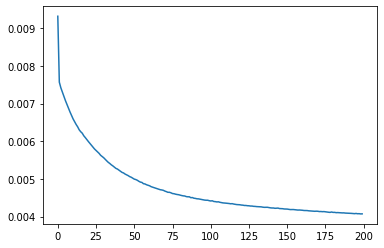

In [29]:
plt.plot(history.history["loss"])
plt.show()

# Modell testen

In [30]:
preds = model.predict(x_test)

In [31]:
preds.shape

(460, 1)

In [32]:
preds_dollar = scaler_output.inverse_transform( preds )
preds_dollar[:10]

array([[ 61706.94 ],
       [116119.125],
       [272375.84 ],
       [140694.17 ],
       [225143.08 ],
       [138968.58 ],
       [177516.27 ],
       [ 98696.195],
       [230698.77 ],
       [118349.07 ]], dtype=float32)

In [33]:
gt_dollar = scaler_output.inverse_transform( y_test )

In [34]:
gt_dollar[:10]

array([[ 82000.],
       [ 86000.],
       [232000.],
       [136905.],
       [181000.],
       [149900.],
       [163500.],
       [ 88000.],
       [240000.],
       [102000.]])

In [35]:
durchschnitt_fehler = np.mean(abs(gt_dollar - preds_dollar))
durchschnitt_fehler

31634.247229534645

# Modell speichern

In [36]:
fname1 = "hauspreis_schaetzer.h5"
model.save(fname1)

In [37]:
import pickle
fname2 = "scaler.pkl"
fobj = open(fname2, "wb")
pickle.dump(scaler_input, fobj)
pickle.dump(scaler_output, fobj)
fobj.close()

# Modell wiederherstellen und anwenden

In [38]:
from tensorflow import keras

new_model = keras.models.load_model("hauspreis_schaetzer.h5")

fobj = open("scaler.pkl", "rb")
scaler_input = pickle.load(fobj)
scaler_output = pickle.load(fobj)
fobj.close()

In [39]:
new_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Schicht1 (Dense)            (None, 80)                320       
                                                                 
 Outputschicht (Dense)       (None, 1)                 81        
                                                                 
Total params: 401
Trainable params: 401
Non-trainable params: 0
_________________________________________________________________


In [40]:
baujahr = float(input("Baujahr:"))
groesse = float(input("Groesse:"))
qualitaet = float(input("Qualität:"))
baujahr, groesse, qualitaet

Baujahr: 2015
Groesse: 5000
Qualität: 9


(2015.0, 5000.0, 9.0)

In [41]:
input_matrix = scaler_input.transform( [[baujahr, groesse, qualitaet]] )

In [42]:
input_matrix

array([[1.03623188, 0.01729416, 0.88888889]])

In [43]:
pred = new_model.predict( input_matrix )

In [44]:
pred_dollar = scaler_output.inverse_transform( pred )[0][0]

In [45]:
print( f"Das Neuronale Netz sagt das Haus kann in etwa für {pred_dollar:.2f} $ verkauft werden." )

Das Neuronale Netz sagt das Haus kann in etwa für 313306.28 $ verkauft werden.
